# PRA UTS PSD_B_Aliya Zulfa Syafitri_23-157

### Langkah - langkah Pengerjaan

### 1. Mengunduh alat - alat yang dibutuhakan
Knime dan PostgreSQL JDBC Driver.

### 2. Membuat data baru di Knime
Tekan tombol "create new workflow", setelah itu akan muncul tombol untuk membuat datanya.

### 3. Pilih Nodes yang dibutuhkan
Setelah itu tarik nodes apa saja yang akan digunakan, disini saya menggunakan beberapa nodes seperti di gambar.

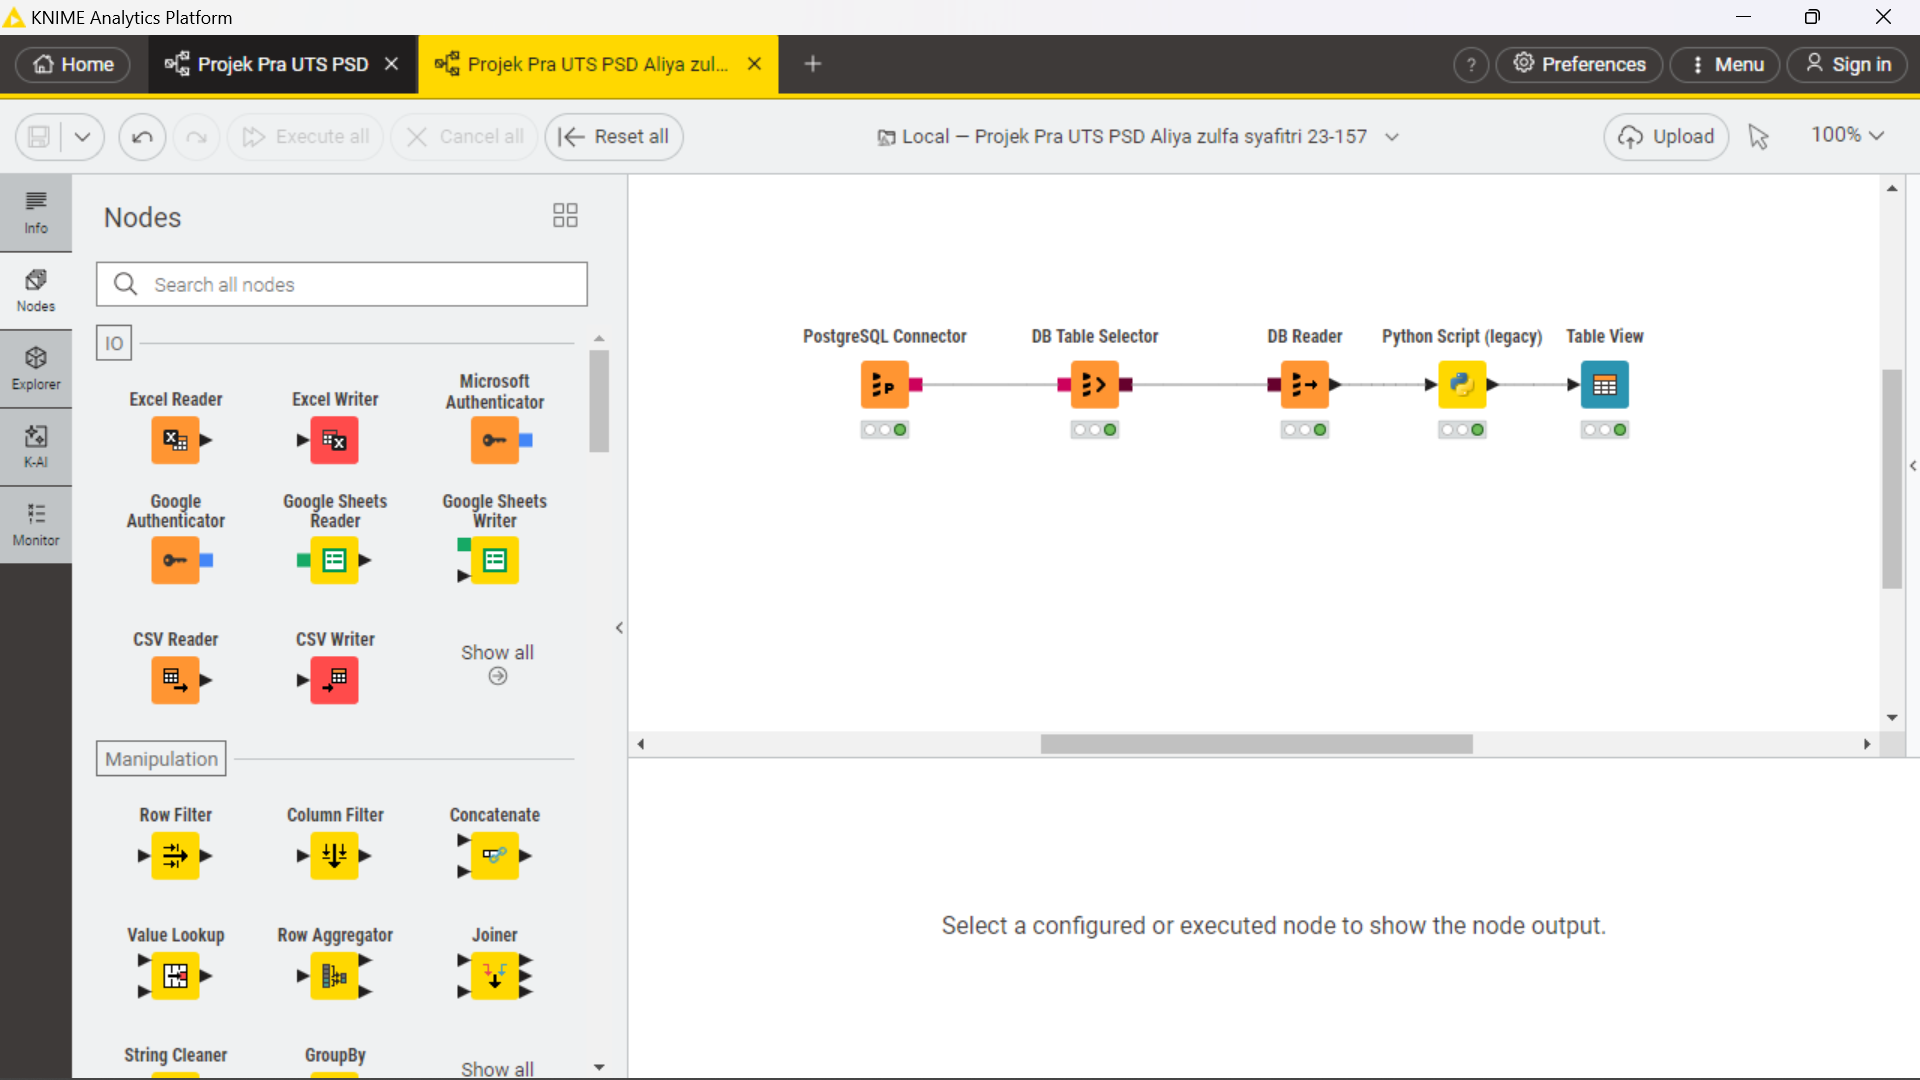

### 5. Mengkofigurasi Nodes yang diperlukan
Untuk menghubungkan database postgesql ke Knime.

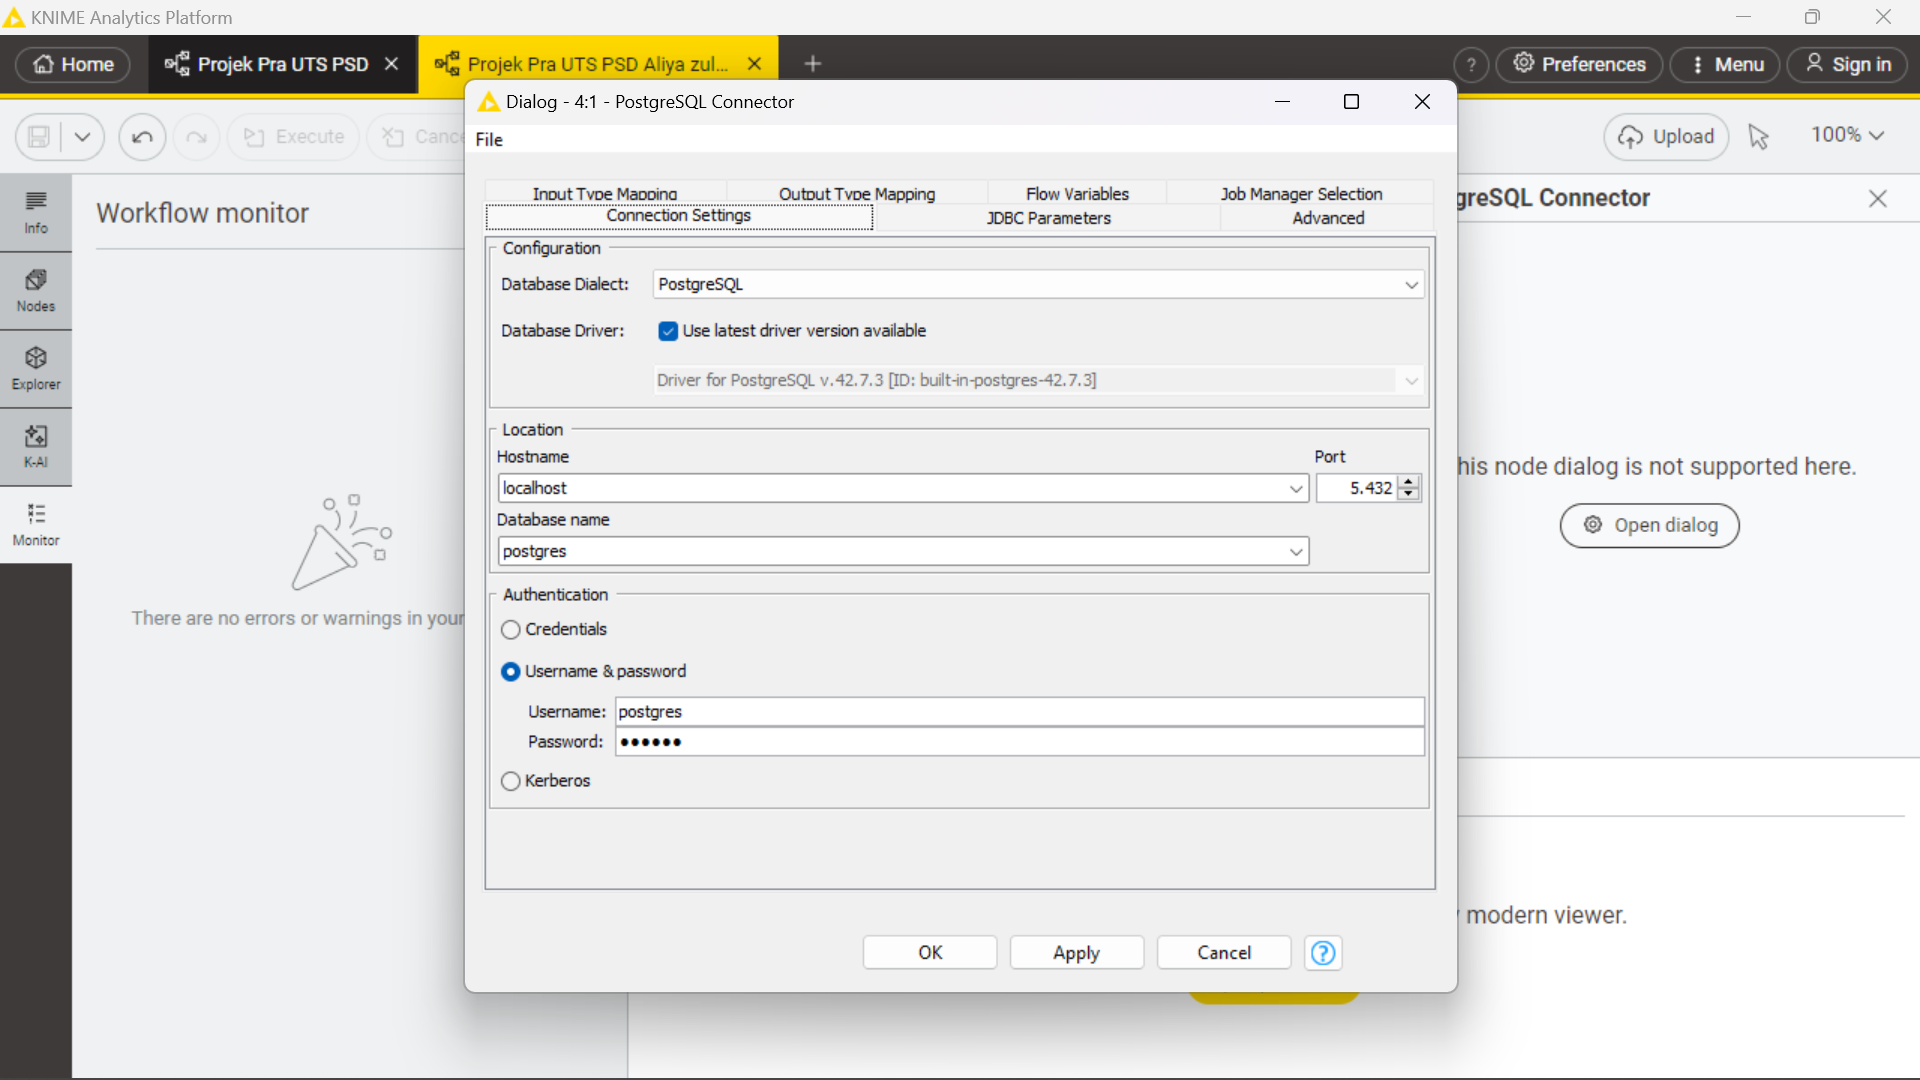

Untuk memilih data yang akan digunakan.

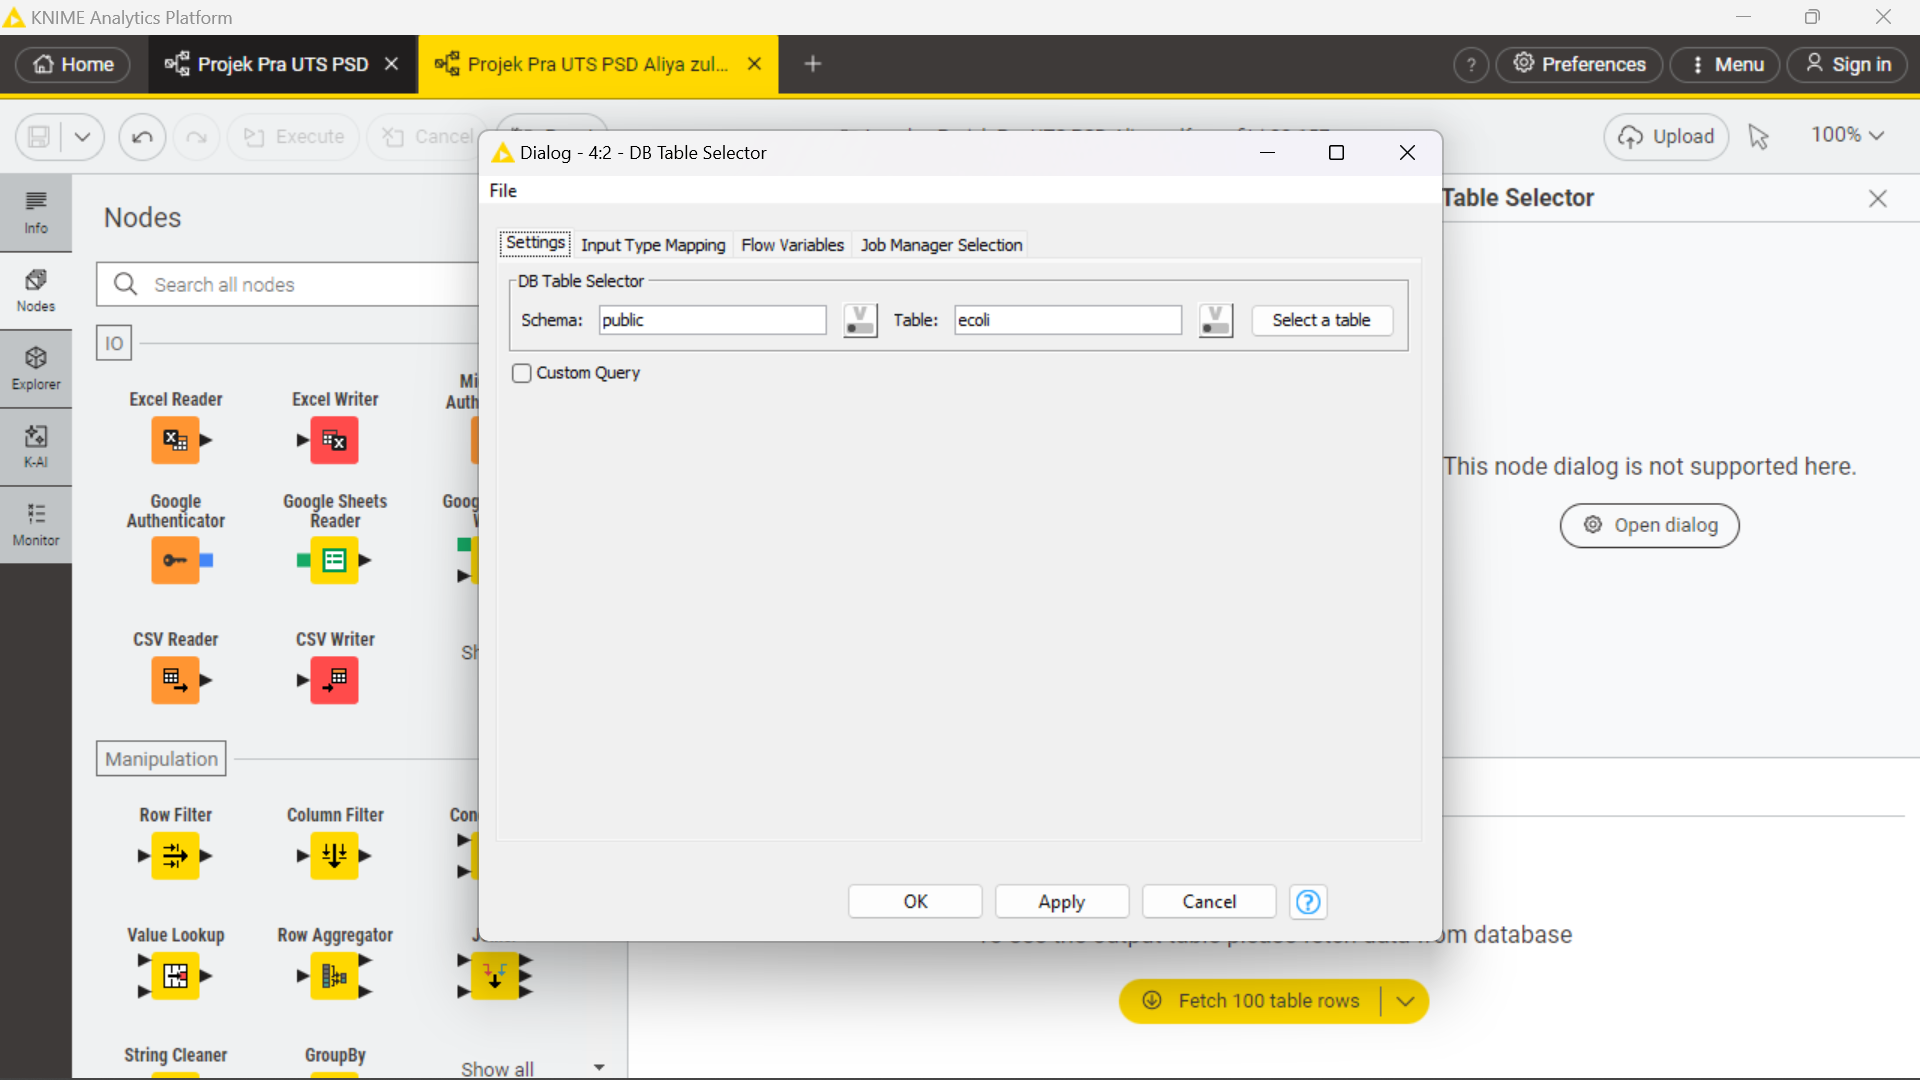

Setelah ini dilakakun, selanjutnya menjalankan apakah database berhasil terhubung ke Knime.

### 6. Mengisi Script Python
isi Script Python di dalam Python Script (Legacy), jika Python Script (Legacy) tidak ada di nodes yang perlu kalian lalukan adalah membuat environment terlebih dahulu di miniconda atau di anaconda saya menggunakan anaconda untuk membuat environment saya.


Ini adalah Script Python yang saya gunakan:
- IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

- AMBIL DATASET DARI KNIME
dataset = input_table_1.copy()

print("=== INFO DATASET ===")
print(dataset.head())
print("\nKolom terdeteksi:", list(dataset.columns))

- DETEKSI KOLOM TARGET SECARA OTOMATIS
if 'localization' in dataset.columns:
    target_col = 'localization'
else:
    target_col = dataset.columns[-1]
print(f"Kolom target digunakan: {target_col}")

- KONVERSI SEMUA FITUR KE NUMERIK (KECUALI TARGET) 
X_raw = dataset.drop(columns=[target_col], errors='ignore')
y = dataset[target_col]

- Paksa ubah ke numerik, selain target
X = X_raw.apply(pd.to_numeric, errors='coerce')

- Hapus kolom yang semuanya NaN (misalnya kolom teks seperti 'protein_name')
X = X.dropna(axis=1, how='all')

- Jika semua kolom hilang, hentikan
if X.shape[1] == 0:
    raise ValueError("Tidak ada kolom numerik yang valid setelah konversi. Periksa dataset Anda.")

- IMPUTASI MISSING VALUE
missing_info = X.isna().sum()
print("\nJumlah missing value awal:\n", missing_info)

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

- DETEKSI OUTLIER (Z-SCORE) 
z_scores = np.abs((X - X.mean()) / X.std())
outlier_mask = (z_scores > 3)

- Jumlah baris yang mengandung minimal satu outlier
num_outlier_rows = outlier_mask.any(axis=1).sum()
persen_outlier = (num_outlier_rows / len(X)) * 100

print(f"\nJumlah baris dengan outlier: {num_outlier_rows}")
print(f"Persentase data outlier: {persen_outlier:.2f}%")

- Tambahkan kolom indikator outlier
X['is_outlier'] = outlier_mask.any(axis=1).astype(int)

- CEK KETIDAKSEIMBANGAN DATA 
class_dist = Counter(y)
print("\nDistribusi kelas:", class_dist)

- STANDARISASI DATA 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- SPLIT DATA 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

- TRAIN MODEL 
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

- EVALUASI MODEL 
acc = accuracy_score(y_test, y_pred)
print("\n=== LAPORAN KLASIFIKASI ===")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nAkurasi Model: {acc*100:.2f}%")

- OUTPUT UNTUK KNIME
output_table_1 = pd.DataFrame({'Prediksi': y_pred})
output_table_2 = pd.DataFrame({
    'Kolom': missing_info.index,
    'Jumlah Missing': missing_info.values
})
output_table_3 = pd.DataFrame({
    'Kelas': list(class_dist.keys()),
    'Jumlah Data': list(class_dist.values())
})
output_table_4 = pd.DataFrame({
    'Jumlah Outlier (baris)': [num_outlier_rows],
    'Persentase Outlier (%)': [round(persen_outlier, 2)],
    'Akurasi Model (%)': [round(acc * 100, 2)]
})

print("\nContoh hasil prediksi:")
print(output_table_1.head())

Setelah berhasil dijalankan, akan muncul hasilnya
### Hasil

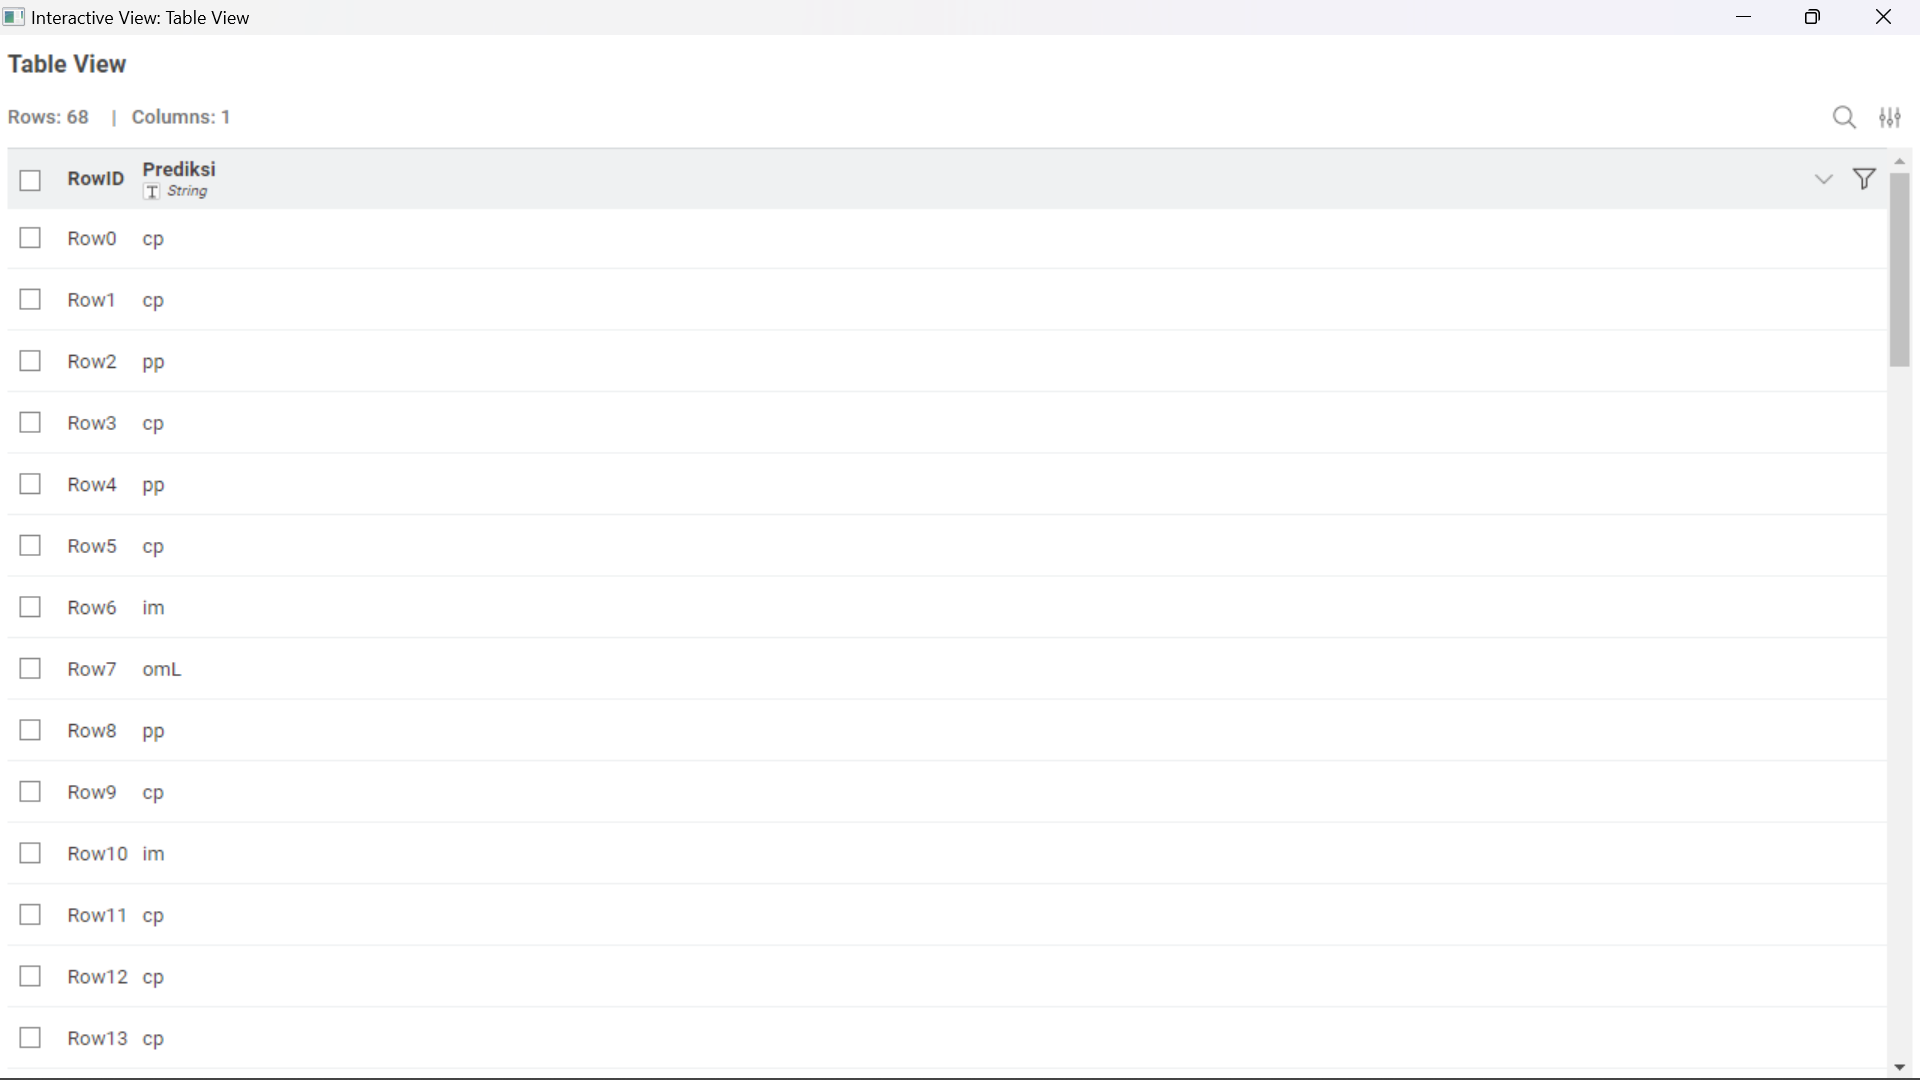